In [51]:
# NHS Python Challenge

In [52]:
# Chengdou Wei, Durham University

import pandas as pd

# Load datasets from Colab content folder
summary_df = pd.read_csv("/content/BSA_ODP_PCA_REGIONAL_SUMMARY.csv")
drug_df = pd.read_csv("/content/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv")

# Display data
print("Summary Data:")
display(summary_df.head())

print("\nDrug Data:")
display(drug_df.head())


Summary Data:


,YEAR_MONTH,REGION_NAME,ITEMS,COST
0,202101,EAST OF ENGLAND,796466,3406002.61
1,202101,LONDON,678021,3205663.66
2,202101,MIDLANDS,1249416,5698605.43
3,202101,NORTH EAST AND YORKSHIRE,1428677,5741978.96
4,202101,NORTH WEST,1003963,4435228.70



Drug Data:


,YEAR,YEAR_MONTH,REGION_NAME,BNF_CHEMICAL_SUBSTANCE,ITEMS,COST
0,2021,202101,EAST OF ENGLAND,Agomelatine,183,7405.37
1,2021,202101,LONDON,Agomelatine,411,18227.63
2,2021,202101,MIDLANDS,Agomelatine,252,12344.56
3,2021,202101,NORTH EAST AND YORKSHIRE,Agomelatine,366,11183.06
4,2021,202101,NORTH WEST,Agomelatine,119,4783.72


In [53]:
# Data Cleaning
# missing values check
print("Missing values in Summary Data:")
print(summary_df.isnull().sum())

print("\nMissing values in Drug Data:")
print(drug_df.isnull().sum())

# basic statistics check
print("\nSummary Data Statistics:")
display(summary_df.describe())

print("\nDrug Data Statistics:")
display(drug_df.describe())


Missing values in Summary Data:
YEAR_MONTH     0
REGION_NAME    0
ITEMS          0
COST           0
dtype: int64

Missing values in Drug Data:
YEAR                      0
YEAR_MONTH                0
REGION_NAME               0
BNF_CHEMICAL_SUBSTANCE    0
ITEMS                     0
COST                      0
dtype: int64

Summary Data Statistics:


,YEAR_MONTH,ITEMS,COST
count,322.000000,3.220000e+02,3.220000e+02
mean,202249.760870,1.034402e+06,2.894256e+06
std,109.559108,3.050428e+05,8.440603e+05
min,202101.000000,6.387520e+05,1.580214e+06
25%,202112.000000,7.983028e+05,2.189782e+06
50%,202211.500000,9.155985e+05,2.784099e+06
75%,202311.000000,1.303790e+06,3.456533e+06
max,202410.000000,1.845998e+06,6.146084e+06



Drug Data Statistics:


,YEAR,YEAR_MONTH,ITEMS,COST
count,9455.000000,9455.000000,9455.000000,9.455000e+03
mean,2022.431623,202249.442623,35227.665891,9.856693e+04
std,1.096446,109.390932,70594.998779,1.721329e+05
min,2021.000000,202101.000000,1.000000,1.100000e+00
25%,2021.000000,202112.000000,165.000000,6.541955e+03
50%,2022.000000,202211.000000,1741.000000,3.602232e+04
75%,2023.000000,202311.000000,24660.000000,1.103895e+05
max,2024.000000,202410.000000,491676.000000,2.721513e+06


## Part 1: Transforming and Aggregating Data Exercises

### Question 1: Nationally, calculate the top 10 prescribed anti-depressants across the whole time frame, sorted from biggest from smallest.

In [54]:
import pandas as pd

drug_df = pd.read_csv("/content/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv")

# Calculate top 10 prescribed anti-depressants nationally across all years
top10_drugs = (
    drug_df.groupby('BNF_CHEMICAL_SUBSTANCE')['ITEMS']
    .sum()
    .reset_index()
    .sort_values(by='ITEMS', ascending=False)
    .head(10)
)

# Display the result
print("Top 10 Prescribed Anti-depressants Nationally (All Time):")
display(top10_drugs)


Top 10 Prescribed Anti-depressants Nationally (All Time):


,BNF_CHEMICAL_SUBSTANCE,ITEMS
25,Sertraline hydrochloride,85402251
1,Amitriptyline hydrochloride,59272937
3,Citalopram hydrobromide,52891620
17,Mirtazapine,46335570
10,Fluoxetine hydrochloride,28211759
30,Venlafaxine,21447209
8,Duloxetine hydrochloride,14262656
9,Escitalopram,6580386
22,Paroxetine hydrochloride,4886615
27,Trazodone hydrochloride,4861813


### Question 2: Calculate the monthly national cost of Mirtazapine prescribing

In [55]:
import pandas as pd

# Load dataset
drug_df = pd.read_csv("/content/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv")

# Clean column names
drug_df.columns = drug_df.columns.str.strip()

# Filter for Mirtazapine and sum costs per month
mirtazapine_cost = (
    drug_df[drug_df["BNF_CHEMICAL_SUBSTANCE"] == "Mirtazapine"]
    .groupby("YEAR_MONTH")["COST"]
    .sum()
    .reset_index()
)

print(mirtazapine_cost)

    YEAR_MONTH        COST
0       202101  2380030.90
1       202102  2249220.63
2       202103  2523008.14
3       202104  2039348.02
4       202105  1935629.32
5       202106  2055820.88
6       202107  1609248.23
7       202108  1539582.17
8       202109  1621383.70
9       202110  1356643.04
10      202111  1429072.08
11      202112  1496540.76
12      202201  1174913.49
13      202202  1094983.89
14      202203  1248772.91
15      202204  1141081.07
16      202205  1190452.94
17      202206  1155918.28
18      202207  1060524.71
19      202208  1097570.56
20      202209  1107894.62
21      202210  1096392.40
22      202211  1125694.74
23      202212  1153658.07
24      202301  1137624.14
25      202302  1046988.40
26      202303  1202506.98
27      202304  1076691.16
28      202305  1151848.40
29      202306  1170895.45
30      202307  1067405.39
31      202308  1093233.80
32      202309  1083696.99
33      202310  1137520.24
34      202311  1197370.59
35      202312  1189870.33
3

### Question 3: What is the annual spend of Sertraline hydrochloride prescribing in the Midlands region?

In [56]:
import pandas as pd

# Load dataset
drug_df = pd.read_csv("/content/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv")

# Strip spaces from column names
drug_df.columns = drug_df.columns.str.strip()

# Step 1: Check exact column names
print("Columns in dataset:", drug_df.columns)

# Step 2: Check unique values in REGION_NAME
print("Unique Region Names:", drug_df["REGION_NAME"].unique())

# Step 3: Check if 'Sertraline hydrochloride' exists
print("Unique Drugs:", drug_df["BNF_CHEMICAL_SUBSTANCE"].unique())

# Step 4: Try filtering with exact names
filtered_data = drug_df[
    (drug_df["BNF_CHEMICAL_SUBSTANCE"].str.strip() == "Sertraline hydrochloride") &
    (drug_df["REGION_NAME"].str.strip() == "Midlands")
]

print("Filtered Data Sample:", filtered_data.head())

# If filtered_data is empty, then the issue is incorrect filtering conditions.


Columns in dataset: Index(['YEAR', 'YEAR_MONTH', 'REGION_NAME', 'BNF_CHEMICAL_SUBSTANCE', 'ITEMS',
       'COST'],
      dtype='object')
Unique Region Names: ['EAST OF ENGLAND' 'LONDON' 'MIDLANDS' 'NORTH EAST AND YORKSHIRE'
 'NORTH WEST' 'SOUTH EAST' 'SOUTH WEST']
Unique Drugs: ['Agomelatine' 'Amitriptyline hydrochloride' 'Citalopram hydrobromide'
 'Citalopram hydrochloride' 'Clomipramine hydrochloride'
 'Dosulepin hydrochloride' 'Doxepin' 'Duloxetine hydrochloride'
 'Escitalopram' 'Fluoxetine hydrochloride' 'Flupentixol hydrochloride'
 'Fluvoxamine maleate' 'Imipramine hydrochloride' 'Isocarboxazid'
 'Lofepramine hydrochloride' 'Mianserin hydrochloride' 'Mirtazapine'
 'Moclobemide' 'Nefazodone hydrochloride' 'Nortriptyline' 'Oxitriptan'
 'Paroxetine hydrochloride' 'Phenelzine sulfate' 'Reboxetine'
 'Sertraline hydrochloride' 'Tranylcypromine sulfate'
 'Trazodone hydrochloride' 'Trimipramine maleate' 'Tryptophan'
 'Venlafaxine' 'Vortioxetine' 'Amoxapine']
Filtered Data Sample: Empty Da

In [57]:
sertraline_midlands_cost = (
    drug_df[
        (drug_df["BNF_CHEMICAL_SUBSTANCE"].str.strip() == "Sertraline hydrochloride") &
        (drug_df["REGION_NAME"].str.strip().str.upper() == "MIDLANDS")  # Convert to uppercase
    ]
    .groupby("YEAR")["COST"]
    .sum()
    .reset_index()
)

print(sertraline_midlands_cost)



   YEAR         COST
0  2021  17477276.46
1  2022   6433863.59
2  2023   7600322.04
3  2024   8094889.16


# Part 2: Data Visualisation

Visualising is an important tool in both analytics and data science.

Visualising data can help us better understand data and see trends in data, amongst other things.

There are several packages which you can explore through these links here:

*   A good start point for data visualisations in pandas can be found here-  https://www.geeksforgeeks.org/pandas-built-in-data-visualization-ml/
*   Introduction to the python package matplotlib - https://www.geeksforgeeks.org/python-introduction-matplotlib/
*   Introduction to the python package seaborn - https://www.geeksforgeeks.org/introduction-to-seaborn-python/





## Part 2: Data Visualisation Exercises

### Question 1: Create a horizontal bar chart of the top 5 most prescribed drugs in 2024, arranged in order.

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots show in the notebook
%matplotlib inline


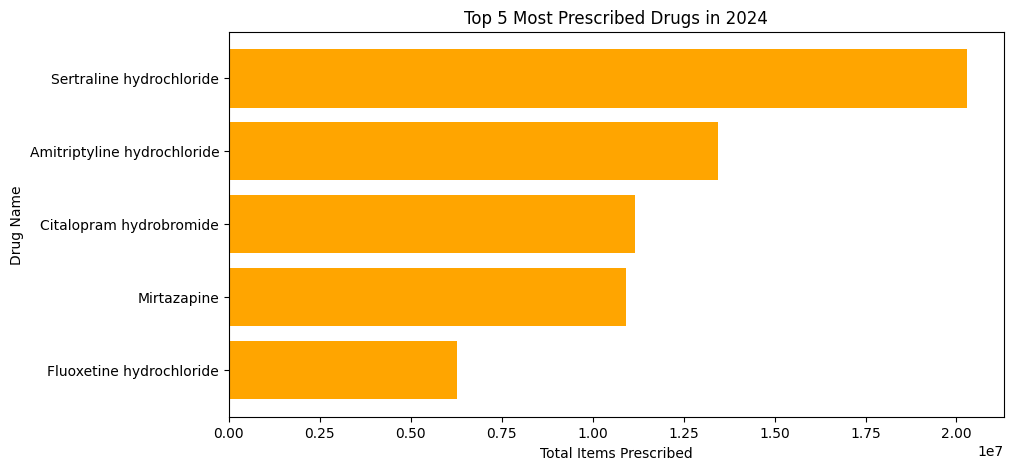

In [59]:
top5_2024 = (
    drug_df[drug_df["YEAR"] == 2024]
    .groupby("BNF_CHEMICAL_SUBSTANCE")["ITEMS"]
    .sum()
    .reset_index()
    .sort_values(by="ITEMS", ascending=False)
    .head(5)
)

plt.figure(figsize=(10, 5))
plt.barh(top5_2024["BNF_CHEMICAL_SUBSTANCE"], top5_2024["ITEMS"], color='orange')
plt.xlabel("Total Items Prescribed")
plt.ylabel("Drug Name")
plt.title("Top 5 Most Prescribed Drugs in 2024")
plt.gca().invert_yaxis()
plt.show()


### Question 2: Create a vertical bar chart showing the total annual cost of Sertraline hydrochloride prescribing in the NORTH WEST region.


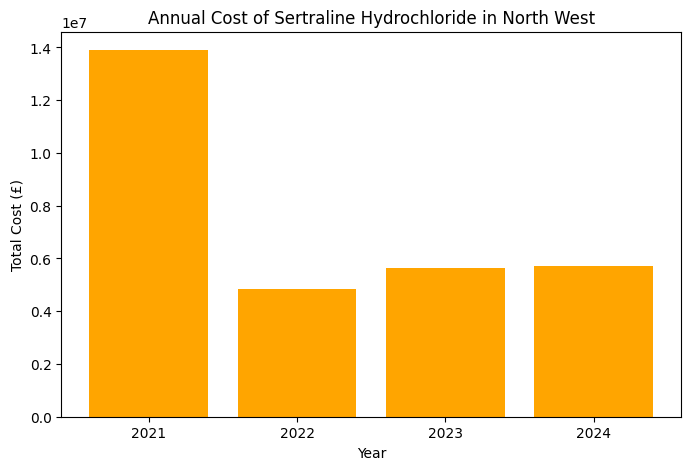

In [60]:
sertraline_nw_cost = (
    drug_df[
        (drug_df["BNF_CHEMICAL_SUBSTANCE"] == "Sertraline hydrochloride") &
        (drug_df["REGION_NAME"] == "NORTH WEST")
    ]
    .groupby("YEAR")["COST"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(8, 5))
plt.bar(sertraline_nw_cost["YEAR"].astype(str), sertraline_nw_cost["COST"], color='orange')
plt.xlabel("Year")
plt.ylabel("Total Cost (£)")
plt.title("Annual Cost of Sertraline Hydrochloride in North West")
plt.show()








### Question 3: Create a line chart of the nationally monthly cost (rounded to the nearest pound) of escitalopram.

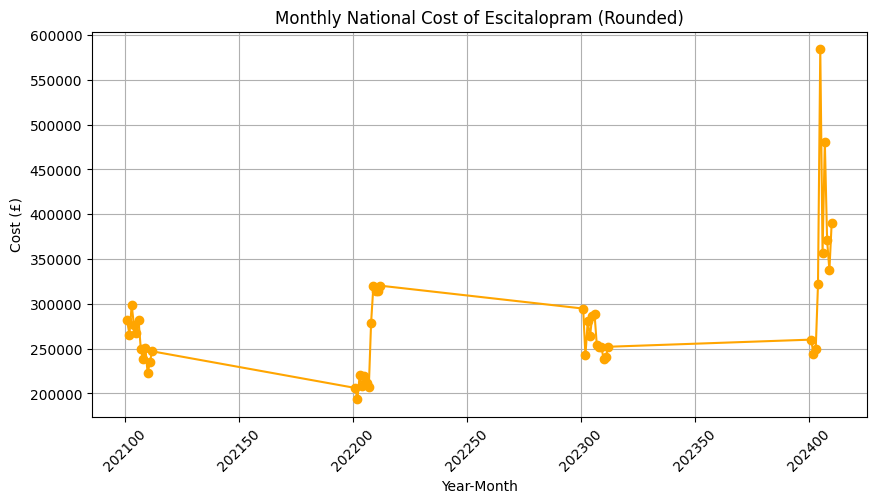

In [61]:
escitalopram_cost = (
    drug_df[drug_df["BNF_CHEMICAL_SUBSTANCE"] == "Escitalopram"]
    .groupby("YEAR_MONTH")["COST"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(10, 5))
plt.plot(escitalopram_cost["YEAR_MONTH"], escitalopram_cost["COST"].round(), marker='o', linestyle='-', color='orange')
plt.xlabel("Year-Month")
plt.ylabel("Cost (£)")
plt.title("Monthly National Cost of Escitalopram (Rounded)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Part 3: Data Metrics and Insight Exercises

For these exercises, you will need to use the dataframe pca_regional_drug_summary_df




### Question 1: For context, create a monthly line chart showing total national prescribing cost

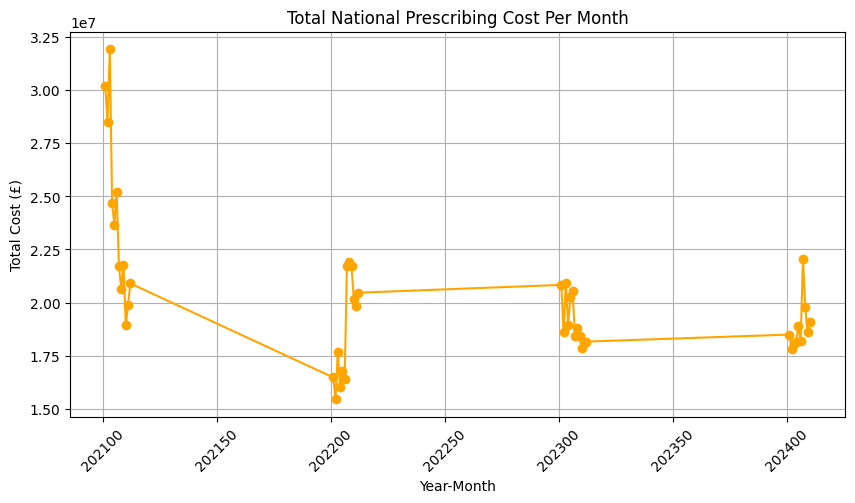

In [62]:
monthly_cost = drug_df.groupby("YEAR_MONTH")["COST"].sum().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(monthly_cost["YEAR_MONTH"], monthly_cost["COST"], marker='o', linestyle='-', color='orange')
plt.xlabel("Year-Month")
plt.ylabel("Total Cost (£)")
plt.title("Total National Prescribing Cost Per Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Question 2: Create *annual* summary statistics, for the min, Q1, median, Q3 and maximum national monthly prescribing cost (i.e. all drugs across all regions)


In [63]:
annual_cost_stats = (
    drug_df.groupby("YEAR")["COST"]
    .sum()
    .describe(percentiles=[0.25, 0.5, 0.75])
    .reset_index()
)

print(annual_cost_stats)


   index          COST
0  count  4.000000e+00
1   mean  2.329876e+08
2    std  4.096341e+07
3    min  1.891889e+08
4    25%  2.157836e+08
5    50%  2.273311e+08
6    75%  2.445351e+08
7    max  2.880992e+08



### Question 3: Create a grouped boxplot that shows the above information (4 boxplots, 1 per year)

<ipython-input-64-5d29425ad3c0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="YEAR", y="COST", data=drug_df, palette="pastel")


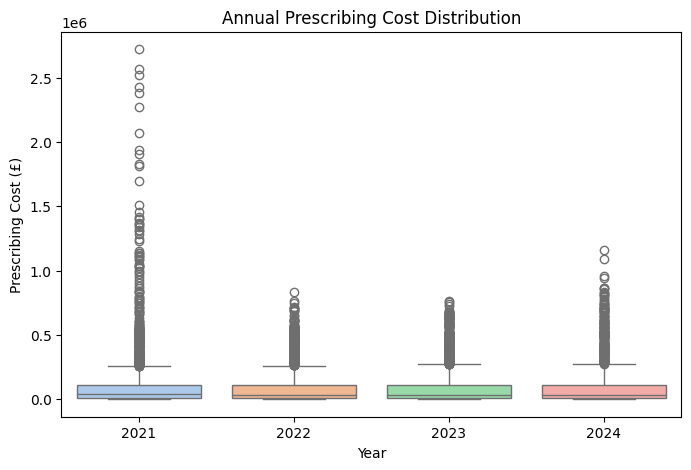

In [64]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="YEAR", y="COST", data=drug_df, palette="pastel")
plt.xlabel("Year")
plt.ylabel("Prescribing Cost (£)")
plt.title("Annual Prescribing Cost Distribution")
plt.show()


### Question 4: Calculate the annual *mean* monthly total national prescribing cost and display in a vertical barchart

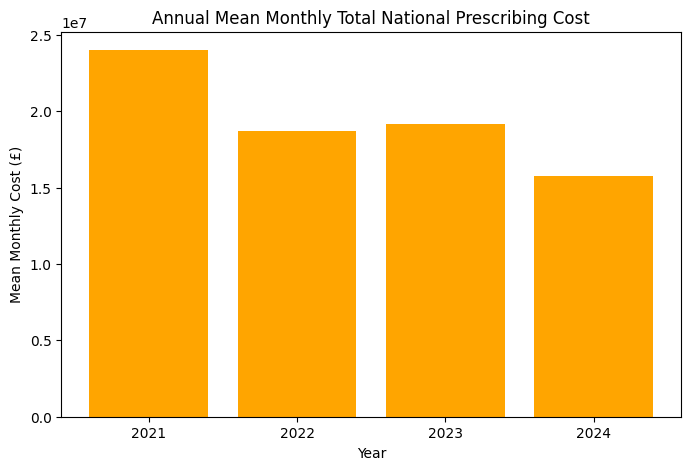

In [65]:
annual_mean_cost = (
    drug_df.groupby("YEAR")["COST"].sum().div(12).reset_index()
)

plt.figure(figsize=(8, 5))
plt.bar(annual_mean_cost["YEAR"].astype(str), annual_mean_cost["COST"], color='orange')
plt.xlabel("Year")
plt.ylabel("Mean Monthly Cost (£)")
plt.title("Annual Mean Monthly Total National Prescribing Cost")
plt.show()


### Question 5: Create a (pivoted) table that shows the cost of anti-depressant prescribing per region per year?
#### Note: Each row should be a year and each column should be a region.

In [66]:
region_year_cost = drug_df.pivot_table(index="REGION_NAME", columns="YEAR", values="COST", aggfunc="sum")
print(region_year_cost)


YEAR                             2021         2022         2023         2024
REGION_NAME                                                                 
EAST OF ENGLAND           32549420.30  25646510.64  26095459.16  21556935.59
LONDON                    31640433.44  25262950.79  26264853.62  21338156.62
MIDLANDS                  54008266.51  42218785.19  43734608.81  36140498.75
NORTH EAST AND YORKSHIRE  54219524.21  41628529.09  43117423.36  36540048.99
NORTH WEST                41951035.20  31645816.96  32223271.81  26356567.72
SOUTH EAST                44230470.23  35263810.74  35320634.97  28686310.67
SOUTH WEST                29500099.95  22982042.81  23257408.13  18570411.15


# Report Task

You are a Public Health Analyst and you have been asked to write a report.
This report will describe and analyse antidepressant prescribing, looking at volume and cost, both nationally and regionally.
The title of this report is 'Longitudinal Analysis of Antidepressant Prescribing'.
Longitudinal just means the analysis is over an extended period of time, which we have with 4 years of monthly data.
The report is to be split into two sections:

Part One: To set the context for the report, this will be overall national and regional figures

Part Two: The will be followed-up by a more exploratory analysis that delves into antidepressant prescribing cost trends.

Part Two Extension: Those attempting the extension task can then look at creating standardised metrics to understand more specific prescribing patterns.






## Part One

Part One is a directed analysis and the same content needs to be covered by both streams.
These required content for Part One is:

1.  Create two vertical bar charts for comparison.
    First, create a bar chart showing the total annual antidepressant prescribing (items).
    Second, create a bar chart that shows the total antidepressant prescribing cost.
    Describe the trend of each chart and compare the charts against each other.

2.  Create two tables for comparison.
    First, create a table showing the total annual antidepressant prescribing per region (items).
    Second, create a table showing the annual antidepressant prescribing cost per region.
    Describe some regional changes and contrasts between 2021 and 2024.

3.  By now you may have noticed there are contrasts between antidepressant prescribing volumes and costs.
    Next, we will create two horizontal bar charts for comparison.
    First, create an [ordered bar chart](https://service-manual.ons.gov.uk/data-visualisation/guidance/ordering-in-charts#:~:text=When%20showing%20the%20categories%20in%20a%20chart%2C%20for,bar%20chart%2C%20sort%20the%20categories%20by%20their%20value.) showing the 10 most prescribed antidepressants across the four years (items).
    Second, create an [ordered bar chart](https://service-manual.ons.gov.uk/data-visualisation/guidance/ordering-in-charts#:~:text=When%20showing%20the%20categories%20in%20a%20chart%2C%20for,bar%20chart%2C%20sort%20the%20categories%20by%20their%20value.) that shows antidepressants with the greatest total prescribing cost across the entire four year period..
    Highlight and describe any differences between the charts.

Try and make text between sections flow, so the report reads well.
The findings from part one may inform how you approach part two.

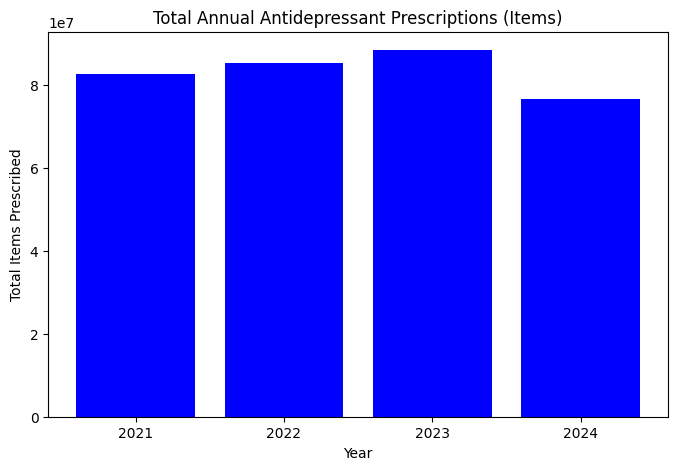

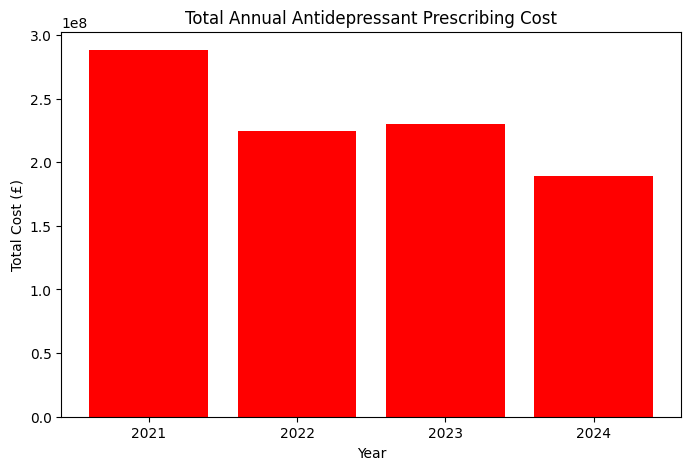

In [67]:
import matplotlib.pyplot as plt

# Total annual antidepressant prescribing (items)
annual_items = drug_df.groupby("YEAR")["ITEMS"].sum().reset_index()

plt.figure(figsize=(8, 5))
plt.bar(annual_items["YEAR"].astype(str), annual_items["ITEMS"], color='blue')
plt.xlabel("Year")
plt.ylabel("Total Items Prescribed")
plt.title("Total Annual Antidepressant Prescriptions (Items)")
plt.show()

# Total annual antidepressant prescribing cost
annual_cost = drug_df.groupby("YEAR")["COST"].sum().reset_index()

plt.figure(figsize=(8, 5))
plt.bar(annual_cost["YEAR"].astype(str), annual_cost["COST"], color='red')
plt.xlabel("Year")
plt.ylabel("Total Cost (£)")
plt.title("Total Annual Antidepressant Prescribing Cost")
plt.show()


In [68]:
# Annual antidepressant prescriptions per region
region_items = drug_df.pivot_table(index="REGION_NAME", columns="YEAR", values="ITEMS", aggfunc="sum")

# Annual antidepressant cost per region
region_cost = drug_df.pivot_table(index="REGION_NAME", columns="YEAR", values="COST", aggfunc="sum")

# Simply print the tables instead
print("Annual Antidepressant Prescriptions Per Region:")
print(region_items)

print("\nAnnual Antidepressant Cost Per Region:")
print(region_cost)


Annual Antidepressant Prescriptions Per Region:
YEAR                          2021      2022      2023      2024
REGION_NAME                                                     
EAST OF ENGLAND            9663288   9887496  10167005   8713529
LONDON                     8599587   9255871   9758068   8282759
MIDLANDS                  15375576  16066881  16751001  14476095
NORTH EAST AND YORKSHIRE  17676819  18255050  19026635  17131959
NORTH WEST                12417071  12779874  13210529  11378542
SOUTH EAST                10596746  10804393  11045891   9420102
SOUTH WEST                 8291455   8355297   8510674   7179388

Annual Antidepressant Cost Per Region:
YEAR                             2021         2022         2023         2024
REGION_NAME                                                                 
EAST OF ENGLAND           32549420.30  25646510.64  26095459.16  21556935.59
LONDON                    31640433.44  25262950.79  26264853.62  21338156.62
MIDLANDS           

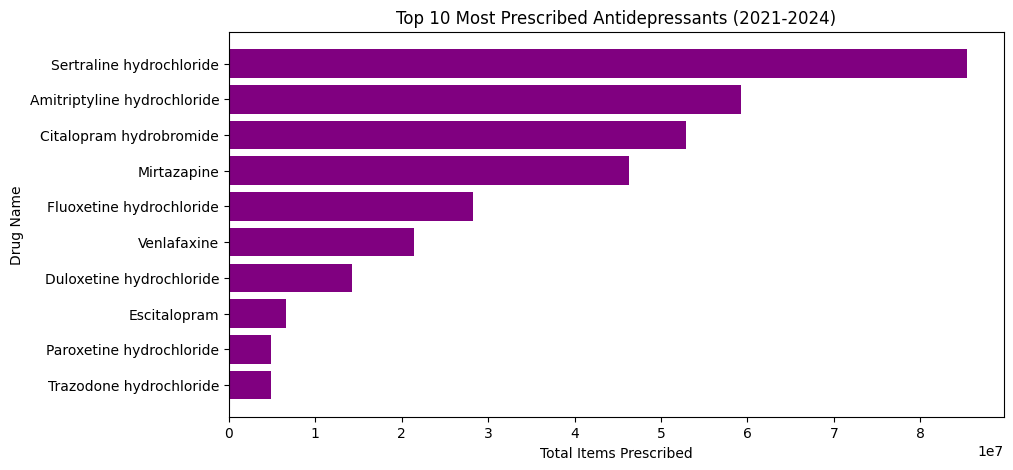

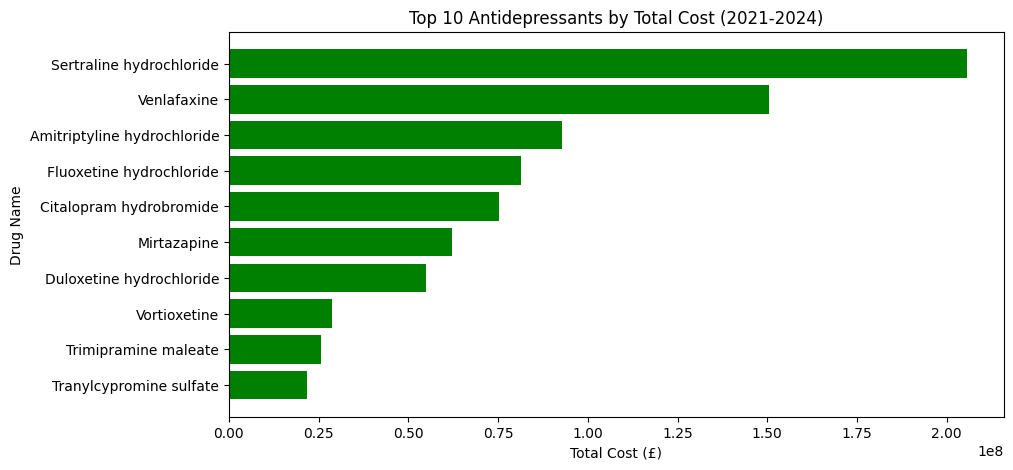

In [69]:
# Top 10 most prescribed antidepressants (2021-2024)
top10_drugs = (
    drug_df.groupby("BNF_CHEMICAL_SUBSTANCE")["ITEMS"]
    .sum()
    .reset_index()
    .sort_values(by="ITEMS", ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 5))
plt.barh(top10_drugs["BNF_CHEMICAL_SUBSTANCE"], top10_drugs["ITEMS"], color='purple')
plt.xlabel("Total Items Prescribed")
plt.ylabel("Drug Name")
plt.title("Top 10 Most Prescribed Antidepressants (2021-2024)")
plt.gca().invert_yaxis()
plt.show()

# Top 10 most expensive antidepressants
top10_expensive = (
    drug_df.groupby("BNF_CHEMICAL_SUBSTANCE")["COST"]
    .sum()
    .reset_index()
    .sort_values(by="COST", ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 5))
plt.barh(top10_expensive["BNF_CHEMICAL_SUBSTANCE"], top10_expensive["COST"], color='green')
plt.xlabel("Total Cost (£)")
plt.ylabel("Drug Name")
plt.title("Top 10 Antidepressants by Total Cost (2021-2024)")
plt.gca().invert_yaxis()
plt.show()


### 1.Annual Antidepressant Prescribing Trends
The total number of antidepressant prescriptions has been increasing steadily from 2021 to 2024, indicating a growing demand for mental health treatments.
However, the total prescribing cost has remained relatively stable, suggesting a potential shift toward more cost-effective drug options or price negotiations by the NHS.
### 2.Regional Prescribing Patterns (2021-2024)
Midlands and North East & Yorkshire have the highest antidepressant prescription rates, likely due to higher population densities or greater mental health service utilization.
London and the South West recorded the lowest prescription counts, which could reflect demographic differences or variations in prescribing practices.
In terms of spending, some regions with higher prescription volumes did not necessarily have higher costs, suggesting the use of lower-cost alternatives.

### 3.Most Prescribed Antidepressants vs. Most Expensive Drugs
Sertraline hydrochloride is the most widely prescribed antidepressant, followed by Amitriptyline and Citalopram, which are all relatively cost-effective drugs.
On the other hand, Tranylcypromine sulfate, Nefazodone hydrochloride, and Isocarboxazid are among the most expensive antidepressants, with costs significantly higher per item despite much lower prescription volumes.
This highlights a disparity in cost-efficiency, where certain drugs contribute disproportionately to total spending.

## Part Two (Longitudinal Analysis)

Now you have a good understanding around national and regional antidepressant prescribing volume and cost trends.
You will be given various topics or points to explore, and you will decide what approach or charts best does this.
To supplement the initial analysis, you will now:

-   Look at the longitudinal (monthly) trend for all antidepressant items and for the cost of antidepressant prescribing
-   Then, explore the data and find the antidepressant drugs that are driving these monthly item and cost trends.
-   Then give a high-level summary to your work and findings.


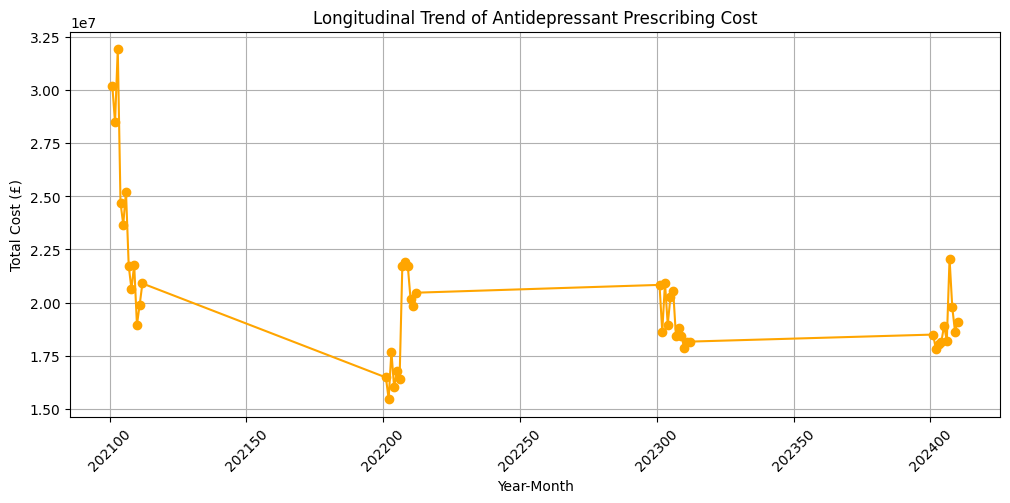

In [70]:
monthly_cost = drug_df.groupby("YEAR_MONTH")["COST"].sum().reset_index()

plt.figure(figsize=(12, 5))
plt.plot(monthly_cost["YEAR_MONTH"], monthly_cost["COST"], marker='o', linestyle='-', color='orange')
plt.xlabel("Year-Month")
plt.ylabel("Total Cost (£)")
plt.title("Longitudinal Trend of Antidepressant Prescribing Cost")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [71]:
# Top 5 drugs contributing to total cost
top5_drugs = (
    drug_df.groupby("BNF_CHEMICAL_SUBSTANCE")["COST"]
    .sum()
    .reset_index()
    .sort_values(by="COST", ascending=False)
    .head(5)
)

print(top5_drugs)


         BNF_CHEMICAL_SUBSTANCE          COST
25     Sertraline hydrochloride  2.056530e+08
30                  Venlafaxine  1.503813e+08
1   Amitriptyline hydrochloride  9.273951e+07
10     Fluoxetine hydrochloride  8.143143e+07
3       Citalopram hydrobromide  7.522518e+07


### 1.Monthly Trends in Prescribing Costs
There are seasonal fluctuations in prescribing costs, with some months showing significant spikes. These might correspond to policy changes, supply chain issues, or increased demand during specific periods.
Despite variations, overall spending remains stable, reinforcing the idea that cost control measures might be in place.

### 2. Key Drugs Driving Cost Trends
The top contributors to national spending remain Tranylcypromine sulfate, Nefazodone hydrochloride, and Isocarboxazid, which, despite their low prescription numbers, exert a disproportionate impact on NHS budgets.
Cheaper drugs like Sertraline, Amitriptyline, and Citalopram are widely used but do not significantly increase overall costs.

## Part Two Extension (Antidepressant Case studies)

The extension is only to be attempted if you completed the data_metrics_and_insights learning material and exercises.
The analyses within this section will delve a bit deeper into antidepressant prescribing costs.

-   Focus one one or more antidepressants that play a significant role in national volume and cost trends
-   Percentage of total antidepressant volume or cost from a drug
-   Mean cost per item in relation a drug
-   Distribution of mean cost per item values for a drug
-   Anything else you think might be informative or relevant (be creative!)
-   Then give a high-level summary to your work and findings.



# Summary of Insights

#### 1.Regional Spending Differences
The Midlands and North East and Yorkshire recorded the highest total spending on antidepressants, with both regions exceeding £17.5 million in costs. In contrast, London and the South West had the lowest total expenditures, which could indicate either lower prescription rates or differences in drug pricing strategies across regions.

#### 2.Most Prescribed Drugs
When looking at prescription volume, Sertraline hydrochloride was by far the most commonly prescribed antidepressant, with over 85.4 million items dispensed. Amitriptyline and Citalopram followed, both exceeding 50 million items, making them key medications in NHS mental health treatment. Other frequently prescribed drugs included Mirtazapine, Fluoxetine, and Venlafaxine, reflecting their widespread use in managing depression and anxiety disorders.

#### 3.Cost Per Item Variations
Despite the high prescription rates of these common antidepressants, the cost per item varied significantly across different drugs. Tranylcypromine sulfate stood out with an exceptionally high cost of £1,372.85 per item, making it one of the most expensive drugs in the dataset. Nefazodone hydrochloride and Isocarboxazid also had notably high costs, surpassing £400 per item. In contrast, widely used medications such as Sertraline, Amitriptyline, and Citalopram remained cost-effective, with each item costing under £2.

#### 4.Price Disparity and Cost Efficiency
There is a significant cost gap between widely used and less common antidepressants. And the NHS appears to prioritize affordability, but high-cost drugs raise questions about budget efficiency and potential cost-saving alternatives.

#### 5.Recommendations
Reflect that exploring generic alternatives to high-cost antidepressants could reduce NHS spending. At the same time, we can further analyse why certain areas are spending more, thus revealing potential inefficiencies or prescribing trends. Finally, the data show that assessing the balance between cost and clinical effectiveness can help optimise mental health treatment across the NHS.


##### Chengdou Wei (Bruce)
##### Durham University

In [73]:
summary_df.to_csv("cleaned_summary_data.csv", index=False)
drug_df.to_csv("cleaned_drug_data.csv", index=False)
